<font color = 'blue'>Ilya Tsuprun KA-76 IASA KPI</font>

# <font color = 'green' style = 'bold'>Aлгоритм имитации отжига для задачи про 8 ферзей</font>
(<font color = 'green' style = 'bold'>Simulated Annealing Algorithm and the Eight Queens problem</font>)

### Общие сведения про метод

Алгоритм имитации отжига - это алгоритм случайной оптимизации, основной особенностью которого стоит выделить то, что для него вероятность достижения глобального оптимума является выше, чем локального.
<br><br>
Алгоритм основывается на имитации физического процесса, который происходит при кристаллизации вещества, в том числе при отжиге металлов. Предполагается, что атомы уже выстроились в кристаллическую решётку, но ещё допустимы переходы отдельных атомов из одной ячейки в другую. Предполагается, что процесс протекает при постепенно понижающейся температуре. Переход атома из одной ячейки в другую происходит с некоторой вероятностью, причём вероятность уменьшается с понижением температуры. Устойчивая кристаллическая решётка соответствует минимуму энергии атомов, поэтому атом либо переходит в состояние с меньшим уровнем энергии, либо остаётся на месте. 

### Пошаговый алгоритм:

#### Алгоритм можно представить в виде 4х простых шагов:
1. Начинать поиск в случай точке х
2. Выбрать новую точку x_j в окрестности N(x)
3. Решить, переходить к новой точке x_j на основании функции вероятности<br> P(x, x_j, T)
4. Понизить изначально положительный параметр 'температуру' T

Функция P(x, x_j, T), которая помогает понять стоит ли двигаться к следующей точке представлена в следующем виде:<br>
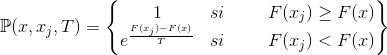
<br>Где F(x) - целевая функция(оптимум которой ищем).

Основную суть при принятии решения можно выразить так:<br>
1. Если новая точка улушает значение целевой функции, мы переместимся в нее с вероятностью 1.
2. Когда новая точка не улучшает значение целевой функции мы переместимся в нее с вероятностью, которая зависит от разницы (F(x_j) - F(x)) и параметра T:<br><br>
 Когда Т принимает большое значение - вероятность перехода также будет высокой, когда Т низкая - вероятность также будет низка. Вот почему сначало мы начнем с высокого Т, чтобы провести большее количество исследований и постепенно уменьшим значение Т для достижения оптимальной точки


### Решение задачи про 8 Ферзей
Cуть: Разместить 8 ферзей на шахматной доске так, чтобы ни один из них не был под ударом.<br>
Целевая функция: Целевая фукнция будет принимать положение ферзей и возвращать количество ферзей, которые расположены в неоходимой позиции.<br><br>
Учитывая то, что ферзи могут двигаться и бить вертикально и горизонтально, то 8 ферзей будут точно расположены на разных вертикальный и горизонтальных линиях, поэтому описать однин вариант расположения для 8 ферзей можно простым массивом из 8 чисел:
<br>
- индекс элемента массива - номер линии сверху начиная с нуля
- значение - количество клеточек до ферзя считая слева
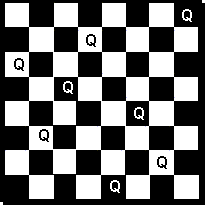

Таким образом, расположение ферзей на картинке выше можно описать следующим массивом чисел:<br>
[7,3,0,2,5,1,6,4]

## Реализация алгоритма:
В языке python есть библиотека mlrose, которая содержит в себе большинство реализованных алгоритмов случайной оптимизации, в том числе и алгорим имитации отжига.

In [1]:
### Импортируем необзодимые библиотеки
import six
import sys
sys.modules['sklearn.externals.six'] = six
import numpy as np
import mlrose
import matplotlib.pyplot as plt

In [2]:
###Задаем целевую функцию:
def queens_max(position):
    # Начинаем отсчет
    no_attack_on_j = 0
    queen_not_attacking=0
    # Делаем проверку для каждой пары ферзей
    for i in range(len(position) - 1):
        no_attack_on_j=0
        for j in range(i + 1, len(position)):
            if (position[j] != position[i]) and (position[j] != position[i] + (j - i)) and (position[j] != position[i] - (j - i)):
                no_attack_on_j += 1
                if(no_attack_on_j==len(position)-1-i):
                    queen_not_attacking+=1
    if(queen_not_attacking==7):
        queen_not_attacking+=1
    return queen_not_attacking

In [3]:
# Передаем целевую функцию в метод "CustomFitness".
objective= mlrose.CustomFitness(queens_max)

#### Опеределяем расписание изменения температуры
В библиотеке mlrose имеются методы, которые помогают установить некоторый стандартный набор расписаний затухания температуры.<br>
Так, например, тут предложены на выбор следующие варинты:
#### <font color = 'brown'>1) Геометрическое затухание (GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))<font><br>
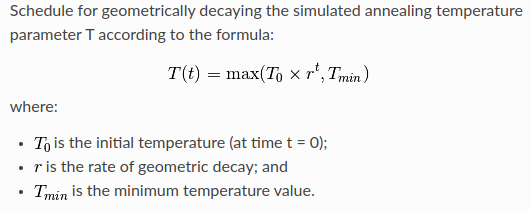<br>
Параметры по умолчанию:<br>
- T0 = 1.0
- r = 0.99
- min_temp = 0.0001

#### <font color = 'brown'>2) Экспоненциальное затухание: (ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001))<font><br>
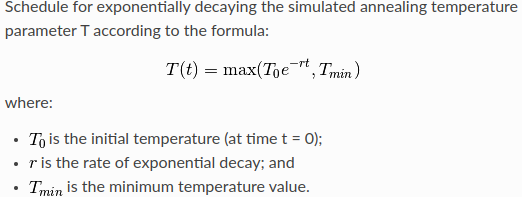<br>
Параметры по умолчанию:<br>
- T0 = 1.0
- r = 0.005
- min_temp = 0.001
    
#### <font color = 'brown'>3) Своя функция изменения <font><br>
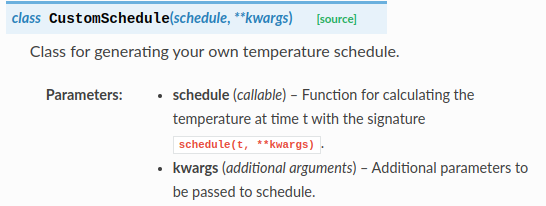<br>

### <font color = 'blue'>Проследим зависимость количества итераций, необходимых для решения задачи при разных "режимах" затухания температурны</font>

Temperature schedule: <mlrose.decay.ExpDecay object at 0x7f4c34669c70>
The best position found is:  [2 5 7 0 4 6 1 3]
The number of queens that are not attacking each other is:  8.0


Temperature schedule: <mlrose.decay.GeomDecay object at 0x7f4c34669520>
The best position found is:  [3 6 0 7 4 1 5 2]
The number of queens that are not attacking each other is:  8.0


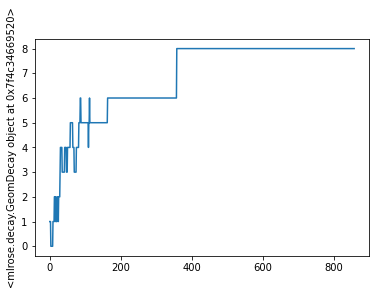

In [19]:
from IPython import display
%matplotlib inline
# Опеределяем расписания изменения температуры
schedule_list = [mlrose.ExpDecay(), mlrose.GeomDecay()]

#Задаем необходимые для решения задачи оптимизации параметры: целевую ф-ю, количетсво переменных, и какой оптимум нам нужен 
problem = mlrose.DiscreteOpt(length = 8, fitness_fn = objective, maximize = True, max_val = 8)

# Задаем случайную начальную позицию ферзей
initial_position = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# Решаем задачу с помощью метода имитации отжига для геометрического и экспоненциального вариантов затухания температуры
for i in schedule_list:
    print("Temperature schedule:", str(i))
    # max attempts - максимальное количество попыток найти лучшего соседа на каждом шаге
    best_position, best_objective, curve = mlrose.simulated_annealing(problem=problem, schedule = i,
    max_attempts = 500, max_iters = 5000,
    init_state = initial_position, curve = True)
    print('The best position found is: ', best_position)
    print('The number of queens that are not attacking each other is: ', best_objective)
    plt.figure()
    plt.plot(curve)
    plt.ylabel(str(i))
    plt.show()

## Вывод: При геометрическом затухании температуры(более резкое уменьшение на каждом шаге), алгоритм намного стремительнее с самого начала движется в сторону глобального максимума, в отличии от экспоненциального затухания.